In [1]:
pip install matplotlib wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install xlrd

In [3]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud
import matplotlib.font_manager as fm
import platform
import os

In [6]:
#뉴스기사 예시 데이터 출처: https://www.bigkinds.or.kr/v2/news/newsDetailView.do?newsId=08100401.20251110114602001
example_txt = """
[앵커]
지난주 4000선 아래로 떨어졌던 코스피가 상승 출발해 장 초반 4000선을 회복했습니다.

원-달러 환율은 1,450원을 넘어서 불안한 모습을 보이고 있습니다.

취재기자를 연결해 금융시장 상황 알아보겠습니다.

류환홍 기자, 코스피가 현재는 얼마나 올라왔습니까?

[기자]
현재는 4060선에 올라와 있습니다.

코스피는 1% 오른 3,991로 출발했는데 개장 1분 후 4000선을 회복했습니다.

이후 상승폭이 2% 넘게 커지며 4060선도 넘었습니다.

외국인과 기관이 동반 순매수를 보이며 지수가 상승했습니다.

외국인 순매수는 6일 만입니다.

시가총액 상위 종목 거의 대부분 상승 중입니다.

삼성전자는 2% 넘게 올라 장중에 '10만 전자'를 회복했고 SK하이닉스는 5% 넘게 올라 장중에 '61만 닉스'를 회복했습니다.

하나와 KB, iM 금융지주 등 은행주는 4% 이상 급등하는 등 강세를 보이고 있습니다.

코스닥도 0.6% 상승 출발했지만 하락과 상승을 반복하며 혼조세를 보이고 있습니다.

개인이 순매수이지만 외국인과 기관은 순매도입니다.

지난주 금요일 뉴욕 증시가 혼조세로 마감했고 원-달러 환율이 오르고 있어서 하락 출발할 것이란 전망이 있었는데 현재까지 코스피는 선방하고 있습니다.

시장에선 미국 행정부의 셧다운 해제가 임박했다는 소식과 우리 정부의 배당소득 분리과세 완화 방침에 코스피가 반등한 것으로 보고 있습니다.

원-달러 환율은 1,450원을 넘었습니다.

서울 외환시장에서 원-달러 환율은 1,457원으로 출발했고 현재도 1,450원대에 올라와 있습니다.

원-달러 환율이 지난 7일 7개월 만에 처음 1,450원을 넘은 후 계속 1,450원대에 머물러 있습니다.

1,450원을 넘는 환율은 우리 증시 상승세를 이끌었던 외국인 투자자에겐 환차손 부담이 되고 있습니다."""

In [7]:
#데이터 준비: 명사 단어 추출
okt = Okt()
nouns = okt.nouns(example_txt)

In [8]:
#추출된 명사의 개수
print(len(nouns))

150


In [9]:
#데이터 탐색: 불용어 제거 및 빈도 계산
stopwords = ['등', '것', '의', '수', '및', '이', '그', '더', '또', '와', '과', '전', '후', '원']
filtered_nouns = []

for noun in nouns:
    #명사의 길이가 1보다 크고 불용어가 포함되어 있지 않은 명사
    if len(noun) > 1 and noun not in stopwords:
        filtered_nouns.append(noun)

print(len(filtered_nouns))

113


In [10]:
#가장 많이 등장한 상위 10개 키워드 추출
noun_counter = Counter(filtered_nouns)
top_keywords = noun_counter.most_common(10)

for word, count in top_keywords:
    print(f"{word}: {count}회")

상승: 6회
환율: 6회
코스피: 5회
출발: 5회
달러: 5회
보이: 4회
외국인: 4회
매수: 3회
기관: 2회
전자: 2회


In [11]:
import platform
import os
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from collections import Counter

font_path = None
font_prop = None

if platform.system() == 'Darwin':
    font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
    if not os.path.exists(font_path):
        font_path = '/Library/Fonts/AppleGothic.ttf'

if font_path and os.path.exists(font_path):
    font_prop = fm.FontProperties(fname=font_path)
else: 
    print("경고: 한글 폰트 경로를 찾지 못했습니다.")

In [16]:
# 그래프 데이터 준비
labels = [word for word, count in top_keywords]
counts = [count for word, count in top_keywords]

print(labels, counts)

['상승', '환율', '코스피', '출발', '달러', '보이', '외국인', '매수', '기관', '전자'] [6, 6, 5, 5, 5, 4, 4, 3, 2, 2]


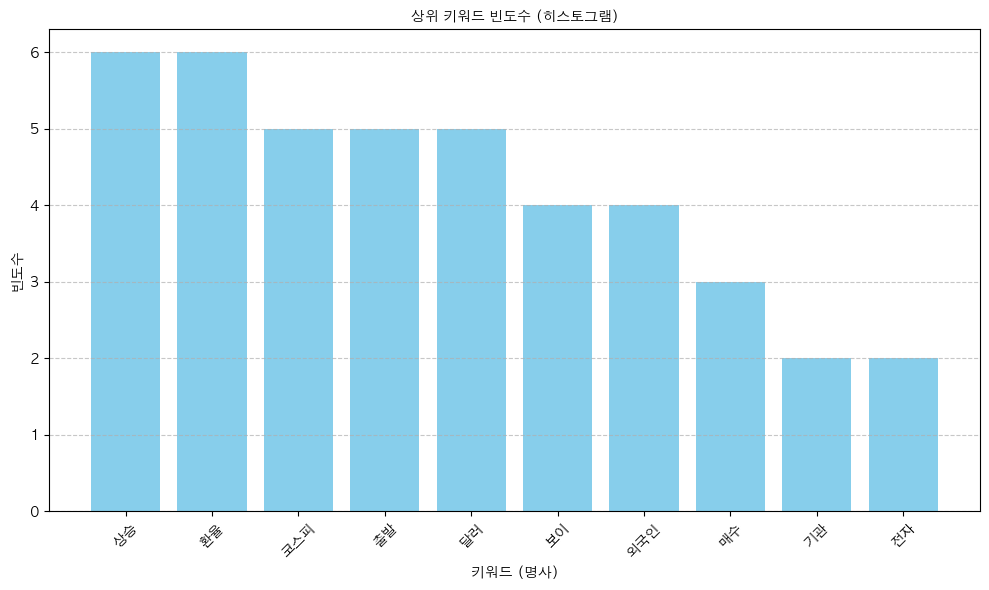

In [17]:
plt.figure(figsize=(10,6))
plt.bar(labels, counts, color='skyblue')

if font_prop: 
    plt.title('상위 키워드 빈도수 (히스토그램)', fontproperties=font_prop)
    plt.xlabel('키워드 (명사)', fontproperties=font_prop)
    plt.ylabel('빈도수', fontproperties=font_prop)
    plt.xticks(rotation=45, fontproperties=font_prop) 
    plt.yticks(fontproperties=font_prop) 
    
else:
    plt.title('Top Keywords (Font Error)')
    plt.xlabel('Keywords')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

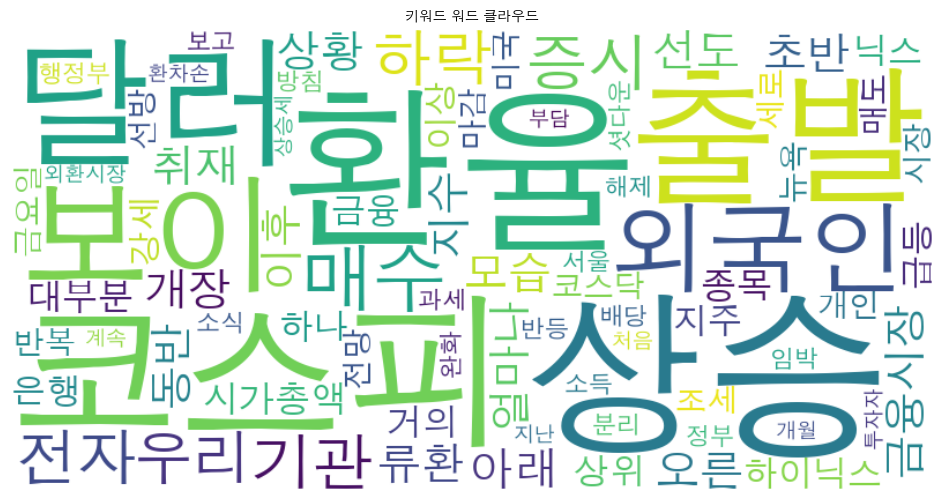

In [14]:
try:
    if font_path and os.path.exists(font_path): 
        wc = WordCloud(
            width=800,
            height=400,
            background_color='white',
            font_path=font_path 
        )
        
        wc.generate_from_frequencies(noun_counter)

        plt.figure(figsize=(12, 6))
        plt.imshow(wc, interpolation='bilinear')
        
        if font_prop:
            plt.title('키워드 워드 클라우드', fontproperties=font_prop)
        else:
            plt.title('Keyword Word Cloud')
            
        plt.axis('off')
        plt.show()
        # print(f"워드 클라우드 폰트를 '{font_path}'로 설정했습니다.")
    
    else:
         print("경고: 워드 클라우드용 한글 폰트 경로를 찾을 수 없습니다.")
         print("워드 클라우드 생성을 건너뜁니다.")

except Exception as e:
    print(f"워드 클라우드 생성 중 오류 발생: {e}")